# Analiza kripto trga s pomočjo CoinGecka

## 1. Uvod

Za projektno nalogo sem analiziral kripto trg s pomočjo podatkov pridobljenih na spletni strani [coingecko.com](https://www.coingecko.com/). Iz mojih izkušenj CoinGecko poda najbolj verodostojne informacije o posamzenih kovancih **različnih** blockchainov, ki zajemajo tako decentralizirane kot centralizirane menjalnice. Pomembno je omeniti, da so podatki pridobljeni dne 30. oktobra 2024 od 16.46 do 16.59 (program potrebuje nekaj časa, da pridobi vse podatke) in da je zbranih prvih 9999 kovancev (rangiranih po Market capu, nato po volumnu).

Program pobere naslednje podatke v tem vrstnem redu:
- mesto po market capu (Rank)
- ime (Name)
- simbol kovanca (Symbol)
- ceno (Price)
- Market cap
- Fully Diluted Valuation (FDV)
- Spremembo cene (24h Change, 7 Days change, 1h Change) 

# 2. Analiza

## 2.1 Splošne razpredelnice
V tem delu smo razvsrstili kovance po njihovih ključnih lastnostih. Tukaj kakšne tople vode ne gre odkrivati.

In [112]:
import pandas as pd

kovanci = pd.read_csv('coin_data.csv')

kovanci['Rank'] = pd.to_numeric(kovanci['Rank'], errors='coerce')
kovanci['Rank'] = kovanci['Rank'].astype('Int64')
kovanci.to_csv('coin_data.csv', index=False)

pd.set_option("display.max_rows", 30)

kovanci

,Rank,Name,Symbol,Price,Market Cap,FDV,24h Change (%),7 Days Change (%),1h Change (%),Volume ($)
0,1,Bitcoin,BTC,"$70,486.71","$1,393,936,005,071","$1,480,220,826,000",-2.075,4.129,0.073,"$47,663,151,000"
1,2,Ethereum,ETH,"$2,526.28","$304,212,014,535","$304,212,014,535",-5.242,0.184,0.121,"$21,110,911,411"
2,3,Tether,USDT,$0.9991,"$120,683,546,763","$120,683,546,763",-0.139,-0.023,0.000,"$32,368,075,618"
3,4,BNB,BNB,$575.54,"$83,959,566,572","$83,959,566,572",-3.898,-2.788,0.132,"$1,106,468,617"
4,5,Solana,SOL,$169.38,"$79,684,149,288","$99,528,057,622",-3.055,-3.761,0.046,"$3,533,607,593"
...,...,...,...,...,...,...,...,...,...,...
9995,<NA>,PIP,PIP,$0.03058,NaN,NaN,-4.319,-44.212,-0.417,"$30,582.87"
9996,<NA>,Brightpool,BRI,$0.009642,NaN,NaN,24.277,13.236,-0.142,"$647,066"
9997,<NA>,Boss,BOSS,$441.01,NaN,NaN,-3.977,-3.837,0.011,"$2,635,166"
9998,<NA>,SOCOMFY,COMFY,$0.00002566,NaN,NaN,-3.248,-4.704,-0.429,"$256,406"


Razpreglednica vseh kovancev rangiranih po market capu.

In [113]:
kovanci['FDV'] = kovanci['FDV'].replace({r'\$': '', ',': ''}, regex=True)
kovanci['FDV'] = pd.to_numeric(kovanci['FDV'], errors='coerce')

kovanci_po_FDV = kovanci.sort_values(by='FDV', ascending=False)

kovanci_po_FDV['FDV'] = kovanci_po_FDV['FDV'].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else "N/A")
kovanci_po_FDV

,Rank,Name,Symbol,Price,Market Cap,FDV,24h Change (%),7 Days Change (%),1h Change (%),Volume ($)
0,1,Bitcoin,BTC,"$70,486.71","$1,393,936,005,071","$1,480,220,826,000",-2.075,4.129,0.073,"$47,663,151,000"
1,2,Ethereum,ETH,"$2,526.28","$304,212,014,535","$304,212,014,535",-5.242,0.184,0.121,"$21,110,911,411"
2732,2732,Slam,SLAM,$0.1931,"$3,085,117","$180,503,910,279",-3.473,-8.617,NaN,$86.54
2,3,Tether,USDT,$0.9991,"$120,683,546,763","$120,683,546,763",-0.139,-0.023,0.000,"$32,368,075,618"
4,5,Solana,SOL,$169.38,"$79,684,149,288","$99,528,057,622",-3.055,-3.761,0.046,"$3,533,607,593"
...,...,...,...,...,...,...,...,...,...,...
9995,<NA>,PIP,PIP,$0.03058,NaN,N/A,-4.319,-44.212,-0.417,"$30,582.87"
9996,<NA>,Brightpool,BRI,$0.009642,NaN,N/A,24.277,13.236,-0.142,"$647,066"
9997,<NA>,Boss,BOSS,$441.01,NaN,N/A,-3.977,-3.837,0.011,"$2,635,166"
9998,<NA>,SOCOMFY,COMFY,$0.00002566,NaN,N/A,-3.248,-4.704,-0.429,"$256,406"


Kovanci rangirani po FDV-ju.

In [114]:
kovanci['Volume ($)'] = kovanci['Volume ($)'].replace({r'\$': '', ',': ''}, regex=True)
kovanci['Volume ($)'] = pd.to_numeric(kovanci['Volume ($)'], errors='coerce')

n = 1000
prvih_n_kovancev = kovanci.head(n)

prvih_n_kovancev_volume = prvih_n_kovancev.sort_values(by='Volume ($)', ascending=False)
prvih_n_kovancev_volume['Volume ($)'] = prvih_n_kovancev_volume['Volume ($)'].apply(
    lambda x: f"${x:,.2f}" if pd.notna(x) else '')

prvih_n_kovancev_volume

,Rank,Name,Symbol,Price,Market Cap,FDV,24h Change (%),7 Days Change (%),1h Change (%),Volume ($)
0,1,Bitcoin,BTC,"$70,486.71","$1,393,936,005,071",1.480221e+12,-2.075,4.129,0.073,"$47,663,151,000.00"
2,3,Tether,USDT,$0.9991,"$120,683,546,763",1.206835e+11,-0.139,-0.023,0.000,"$32,368,075,618.00"
1,2,Ethereum,ETH,"$2,526.28","$304,212,014,535",3.042120e+11,-5.242,0.184,0.121,"$21,110,911,411.00"
13,14,Shiba Inu,SHIB,$0.00001794,"$17,939,212,750",NaN,-2.901,0.817,0.036,"$10,571,011,896.00"
5,6,USDC,USDC,$1.00,"$34,940,735,984",3.494038e+10,0.016,0.078,0.070,"$5,563,790,845.00"
...,...,...,...,...,...,...,...,...,...,...
752,753,Spiko US T-Bills Money Market Fund,USTBL,$1.02,"$40,554,381",4.055438e+07,0.046,0.116,0.000,$0.00
226,227,cWBTC,CWBTC,"$1,415.26","$283,961,257",2.839613e+08,-2.269,3.236,-0.174,$0.00
285,286,Nexus Mutual,NXM,$57.39,"$201,419,467",2.014195e+08,-5.214,-0.018,-0.160,$0.00
533,534,Spiko EU T-Bills Money Market Fund,EUTBL,$1.11,"$74,008,157",7.400816e+07,0.148,0.536,0.069,$0.00


Prvih 1000 kovancev (po Market Cap-u) rangiranih po 24-urnem volumnu

In [115]:
kovanci = pd.read_csv('coin_data.csv')


kovanci['24h Change (%)'] = pd.to_numeric(kovanci['24h Change (%)'], errors='coerce')

kovanci_filtered = kovanci.dropna(subset=['24h Change (%)'])


kovanci_sorted = kovanci_filtered.sort_values(by='24h Change (%)', ascending=False)

def color_change(val):
    color = 'green' if val > 0 else 'red' if val < 0 else 'black'
    return f'color: {color}'

pobarvani = kovanci_sorted.style.map(color_change, subset=['24h Change (%)'])
pobarvani.data = pd.concat([pobarvani.data.head(10), pobarvani.data.tail(10)])

pobarvani

,Rank,Name,Symbol,Price,Market Cap,FDV,24h Change (%),7 Days Change (%),1h Change (%),Volume ($)
9013,nan,CoinPoker,CHP,$0.05568,nan,nan,205910.464000,205910.464000,-0.065000,"$15,493,299"
6173,nan,Black Agnus,FTW,"$4,496,841",nan,nan,10197.789000,5534.724000,-0.781000,"$67,452,612"
7175,nan,Wukong Musk,WUKONG,$0.0002581,nan,nan,6039.582000,5927.765000,-0.164000,"$5,162,933"
6229,nan,Recharge,RCG,$0.03697,nan,nan,3230.153000,1330.186000,10.718000,"$36,938,517"
7700,nan,Zen,ZEN,$0.004359,nan,nan,2385.006000,-96.788000,-0.359000,"$4,358,635"
5088,5090.000000,Mogul Productions [OLD],STARS,$0.0002777,"$111,017",nan,955.772000,1018.390000,-0.674000,"$81,225.59"
6983,nan,CATX,CATX,"$80,268.02",nan,nan,568.862000,465.890000,0.104000,"$314,871"
6714,nan,Chiitan,CHIITAN,$0.0003428,nan,nan,417.659000,428.240000,77.401000,"$342,781"
1608,1609.000000,TRUMP 47,47,$0.009465,"$7,795,401",nan,362.584000,nan,-19.487000,"$7,795,401"
3868,3868.000000,Wall Street Games [OLD],WSG,"$2,431.42","$1,018,281",nan,336.160000,349.640000,-0.144000,"$433,174"


10 biggest winners and 10 biggest losers

## 2.2 Analiza trga
V tem delu bomo skušali iz podatkov potegniti kakšno lastnost, ki ni takoj očitna. Za začetek bom iz **page1.txt ** Izluščil naslednje podatke: Total Volume in Total Market Cap.

In [116]:
import re

with open('page1.txt', 'r', encoding="utf-8") as file:
    html_content = file.read()

market_cap_regex = r'\$[0-9]+(?:\.[0-9]+)?\s*(?:Trillion|Billion)'
volume_regex = r'\$[0-9]+(?:\.[0-9]+)?\s*(?:Billion|Million)'  

market_cap_match = re.search(market_cap_regex, html_content)
volume_match = re.search(volume_regex, html_content)

total_market_cap = market_cap_match.group() if market_cap_match else 'Not Found'
total_volume = volume_match.group() if volume_match else 'Not Found'


print(total_market_cap)
print(total_volume)

$2.46 Trillion
$114 Billion


Fiat valute so kripto dolar. Spodaj je analiza top 30 fiat valut po volumnu in MC.

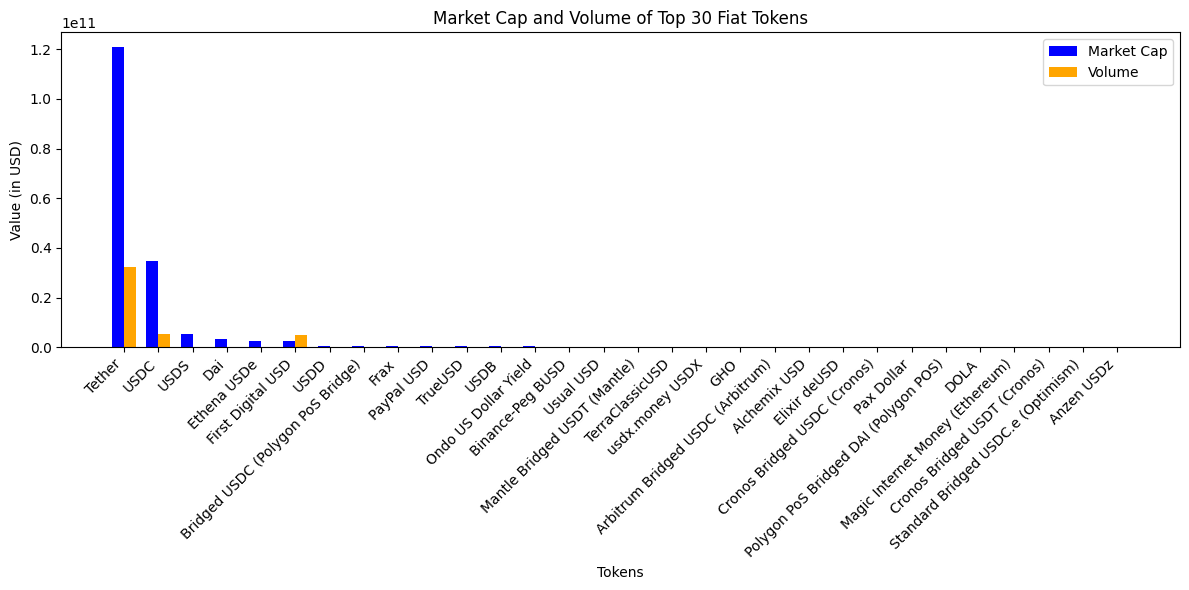

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('coin_data.csv')

top_2000 = df.head(2000)

fiat_symbols = ['FRAX', 'DAI', 'GHO', 'USTC', 'DOLA', 'MIM', 'MIMATIC']

fiat_tokens = top_2000[top_2000['Symbol'].str.contains('USD', case=False) | top_2000['Symbol'].isin(fiat_symbols)].copy()

fiat_tokens['Market Cap'] = fiat_tokens['Market Cap'].replace({r'\$': '', r',': ''}, regex=True)
fiat_tokens['Volume ($)'] = fiat_tokens['Volume ($)'].replace({r'\$': '', r',': ''}, regex=True)

fiat_tokens['Market Cap'] = pd.to_numeric(fiat_tokens['Market Cap'], errors='coerce')
fiat_tokens['Volume ($)'] = pd.to_numeric(fiat_tokens['Volume ($)'], errors='coerce')

fiat_tokens.dropna(subset=['Market Cap', 'Volume ($)'], inplace=True)

top_30_fiat_tokens = fiat_tokens.nlargest(30, 'Market Cap')[['Name', 'Market Cap', 'Volume ($)']]

plt.figure(figsize=(12, 6))

bar_width = 0.35

index = range(len(top_30_fiat_tokens))

plt.bar(index, top_30_fiat_tokens['Market Cap'], bar_width, label='Market Cap', color='blue')
plt.bar([i + bar_width for i in index], top_30_fiat_tokens['Volume ($)'], bar_width, label='Volume', color='orange')


plt.xlabel('Tokens')
plt.ylabel('Value (in USD)')
plt.title('Market Cap and Volume of Top 30 Fiat Tokens')
plt.xticks([i + bar_width / 2 for i in index], top_30_fiat_tokens['Name'], rotation=45, ha='right')
plt.legend()


plt.tight_layout()
plt.show()

Spodnja diagrama prikazujeta kakšen delež predstavlja prvih 10 kovancev v vsem dnevnem volumnu in celotnem Market Cap-u.

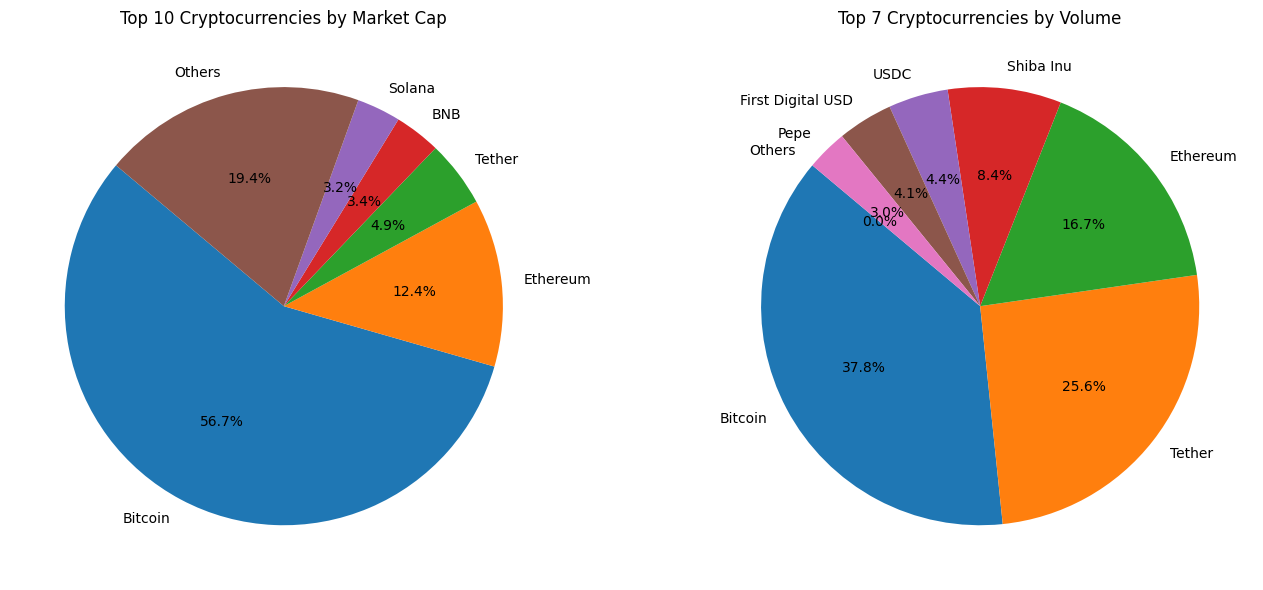

In [ ]:
def convert_to_numeric(value):
    value = value.replace('$', '').replace(',', '').strip()
    if 'Trillion' in value:
        return float(value.replace('Trillion', '').strip()) * 1e12  
    elif 'Billion' in value:
        return float(value.replace('Billion', '').strip()) * 1e9  
    elif 'Million' in value:
        return float(value.replace('Million', '').strip()) * 1e6  
    else:
        return float(value) 
    
total_market_cap_numeric = convert_to_numeric(total_market_cap)
total_volume_numeric = convert_to_numeric(total_volume)

df = pd.read_csv('coin_data.csv')

df['Market Cap'] = df['Market Cap'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
top_10_by_MC = df.nsmallest(5, 'Rank')[['Name', 'Market Cap']]

df['Volume ($)'] = df['Volume ($)'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
top_1000 = df.head(1000)
top_10_by_volume = top_1000.nlargest(7, 'Volume ($)')[['Name', 'Volume ($)']]


plt.figure(figsize=(14, 6))

market_cap_values = top_10_by_MC['Market Cap'].tolist()
market_cap_labels = top_10_by_MC['Name'].tolist()
market_cap_percentage = [(value / total_market_cap_numeric) * 100 for value in market_cap_values]


others_percentage = 100 - sum(market_cap_percentage)
if others_percentage < 0:
    others_percentage = 0 
market_cap_percentage.append(others_percentage)
market_cap_labels.append('Others') 


plt.subplot(1, 2, 1)
colors = plt.cm.tab10.colors 
plt.pie(market_cap_percentage, labels=market_cap_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 Cryptocurrencies by Market Cap')


volume_values = top_10_by_volume['Volume ($)'].tolist()
volume_labels = top_10_by_volume['Name'].tolist()
volume_percentage = [(value / total_volume_numeric) * 100 for value in volume_values]


others_volume_percentage = 100 - sum(volume_percentage)
if others_volume_percentage < 0:
    others_volume_percentage = 0  
volume_percentage.append(others_volume_percentage)
volume_labels.append('Others')  


plt.subplot(1, 2, 2)
plt.pie(volume_percentage, labels=volume_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 7 Cryptocurrencies by Volume')


plt.tight_layout()
plt.show()

# 3. Zaključek
Kakšne tople vode s to seminarsko nalogo nismo odkrivali. Kovance smo rangirali po vseh njihvih klasičnih lastnostih (Market Cap, Volume, Price Change ...). Prednost, ki jo program prinaša pred CoinGeckom pa je ta, da smo razvrstili vse nabrane kovance po drugih lastnostih poleg Market Cap-a, ki na sami spletni strani niso možne.

## 3.1 Ključne ugotovitve
Če gremo po vrsti, prvo omembe vredno posebnost prinaša rangiranje po volumnu. Tam je razvidno, da so fiat valute in BTC zastopane v približno enaki meri. Bitcoin vseeno prevladuje in ni nič čudnega, da se ves trg obrača po njem. Po drugi strani, lahko rečemo, da še ni popolno integriran, saj približno polovica menjav še vedno poteka v fiat valutah.

Tabela za 24h spremembo kaže na volatilnost kripta.

Zanimiveše ugotovitve čakajo v drugem delu Analize. V fiat segmentu graf kaže na dominanco USDT-ja, sledi mu USDC, drugih pa se praktično ne uporablja. Na naslednjih grafih vidimo, da je BTC dominanca še vedno ogromna. Če temu, dodamo še druge 4 največje kovance na trgu pridemo do spoznanja, da je večina denarja skoncentrirana v tem "oligopolu". To nakazauje na nezrelost kripto gospodarstva in prevladovanja principa "store of value", nezrelost pa je simptom ene izmed dveh možnosti. Ali je dejansko crypto le plevel in je edina vrednost, ki jo nosi v povpraševanju in ponudbi ali pa je kripto gospodarstvo v zibelki in ga čaka splošna rast. Sam sem pristaš slednje.

Še bolj zanimivo za moj okus je pogled na razporeditev volumna. Praktično 99.9% se ga skriva v 9ih kovancih. Za malega človeka je ta novica odlična. Za velike ribe so lahko zanimi samo večji kovanci, s čimer nastane nešteto priložnosti za tiste z manjšo mošnjo, saj je pozornost od skritih draguljev preusmerjena.